In [1]:
%load_ext autoreload

In [ ]:
%autoreload 2

import logging

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker, utils, dashboard

logging.basicConfig()

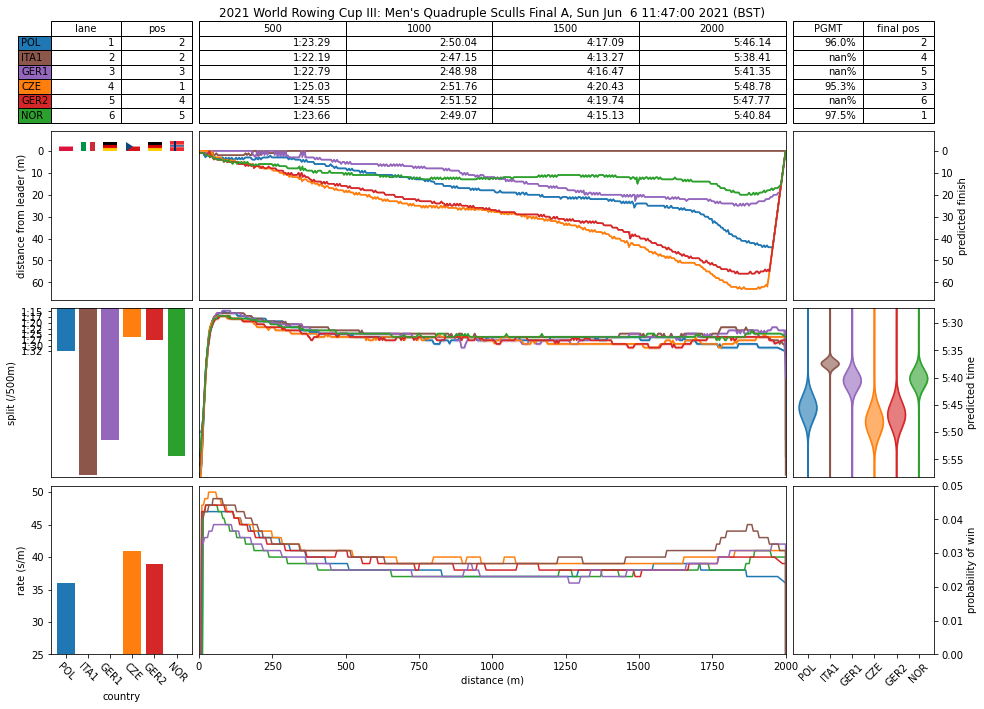

,Race,Time,Time to race
0,Men's Single Sculls Final A,2021-06-06 12:02:00+01:00,00:08:19
1,Women's Single Sculls Final A,2021-06-06 12:17:00+01:00,00:23:19
2,Men's Eight Final A,2021-06-06 12:32:00+01:00,00:38:19


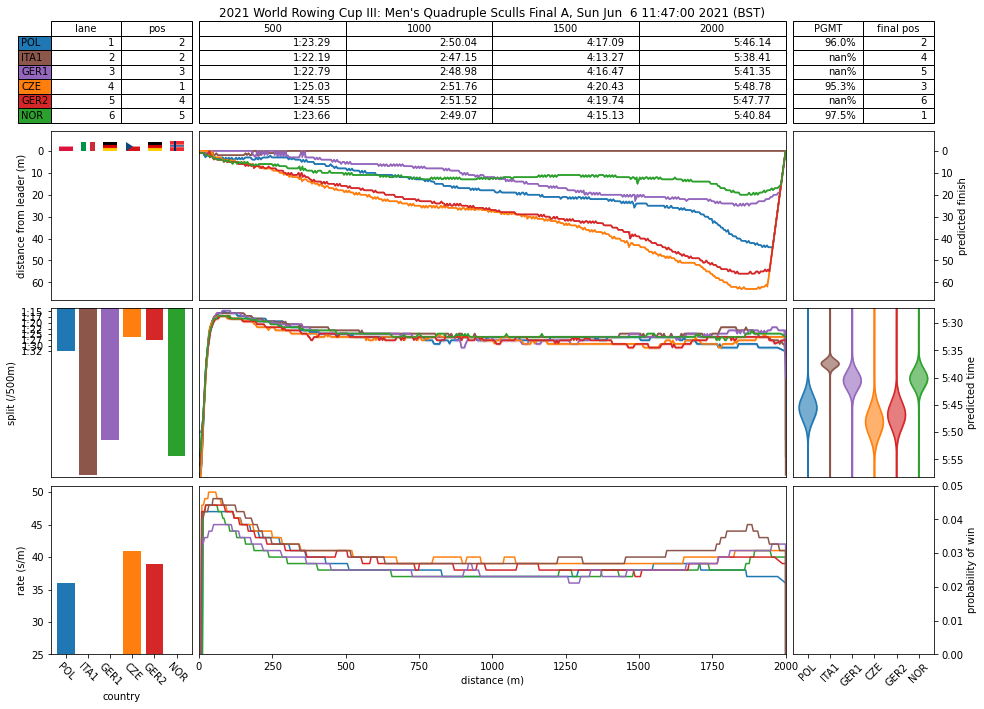

In [130]:
dash = dashboard.Dashboard.load_last_race(figsize=(14, 10))
dash.live_dashboard()

api.show_next_races()

In [124]:
comp_pgmts = api.get_competition_pgmts()
group_boat_pgmts = comp_pgmts.groupby('BoatClass')
boat_pgmts = group_boat_pgmts\
    .first()\
    .sort_values('PGMT', ascending=False)
boat_pgmts

,Country,Rank,Lane,Date,Time,worldBestTime,PGMT
BoatClass,,,,,,,
LW2x,NED,1,5,2021-06-06 10:17:00,6:43.79,6:47.69,1.009658
W4-,NED,1,3,2021-06-06 09:32:00,6:20.21,6:14.36,0.984614
W2x,NED,1,4,2021-06-06 09:02:00,6:44.79,6:37.31,0.981521
M2x,POL,1,3,2021-06-06 09:17:00,6:06.50,5:59.72,0.981501
W2-,DEN,1,6,2021-06-06 08:35:00,6:57.68,6:49.08,0.979410
M2-,CRO1,1,4,2021-06-06 08:47:00,6:16.79,6:08.50,0.977998
LM2x,NOR1,1,2,2021-06-06 10:02:00,6:14.03,6:05.36,0.976820
M4x,POL,1,3,2021-06-04 10:00:00,5:42.28,5:32.26,0.970726
M4-,ITA1,1,4,2021-06-06 09:47:00,5:48.16,5:37.86,0.970416


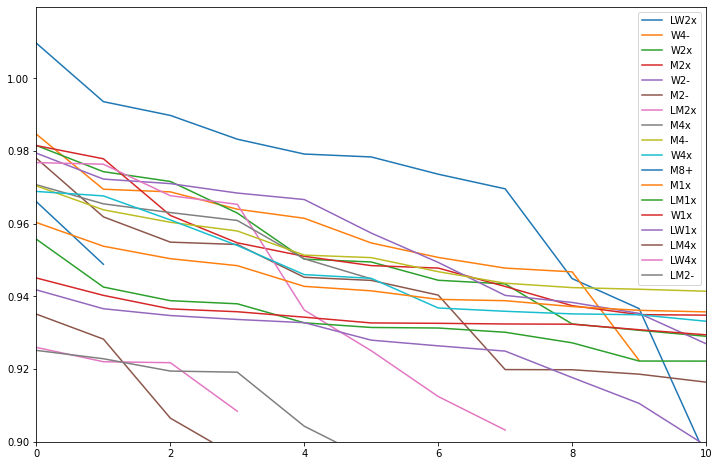

In [129]:
f, ax = plt.subplots(figsize=(12, 8))

for boat in boat_pgmts.index:
    pgmt = group_boat_pgmts.get_group(boat).PGMT.sort_values(ascending=False)
    ax.plot(pgmt.values, label=boat)
    
ax.set_xlim(0, 10)
ax.set_ylim(0.9, comp_pgmts.PGMT.max() + .01)
ax.legend();